In [2]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

sess = dbutils.get_session()

Experiment (plocalf1fps1w10c2m1g)


<IPython.core.display.Javascript object>


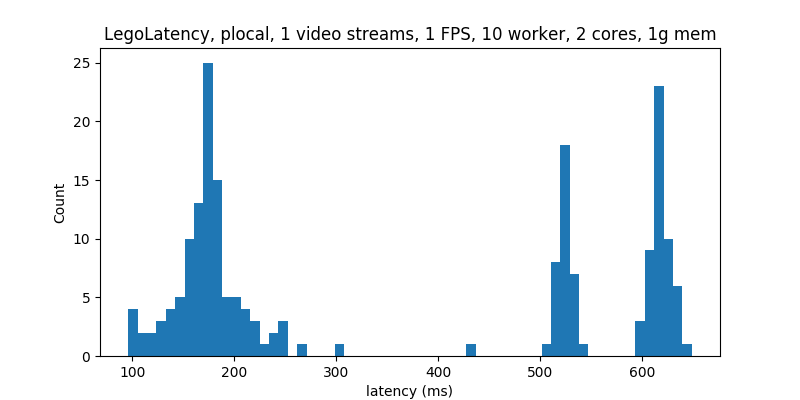

Experiment (plocalf1fps1w10c4m1g)


<IPython.core.display.Javascript object>


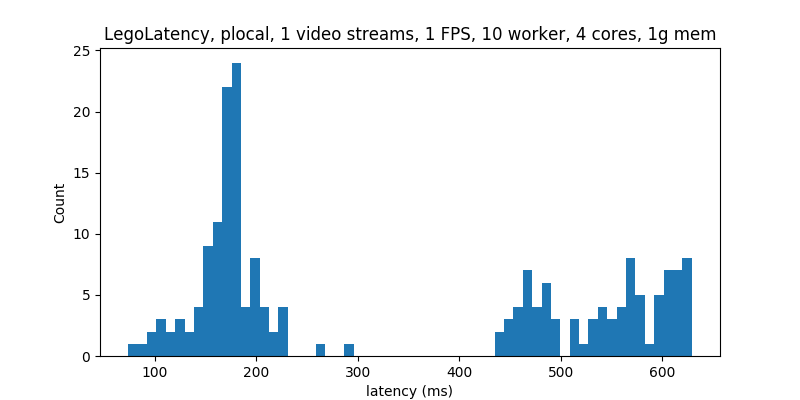

Experiment (plocalf1fps2w10c2m1g)
Experiment (plocalf1fps2w10c4m1g)


In [3]:
prefix = ['plocal'] #, 'pwifi', 'ppoorwifi']
feeds = [1]
fpss = [1, 2]
workers = [10]
cores = [2, 4]
memorys = ["1g"]

choices = [prefix, feeds, fpss, workers, cores, memorys]
for combo in itertools.product(*choices):
    exp_name = '{}f{}fps{}w{}c{}m{}'.format(*combo)
    print("Experiment ({})".format(exp_name))
    latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name==exp_name).all()]
    if len(latencys) == 0:
        continue
    plt.figure(figsize=(8, 4))
    plt.hist(latencys, bins=60);
    plt.ylabel('Count');
    plt.xlabel('latency (ms)');
    plt.title('LegoLatency, {}, {} video streams, {} FPS, {} worker, {} cores, {} mem'.format(*combo))

Experiment (plocalkafkaf1fps1w10c4m1g)


<IPython.core.display.Javascript object>


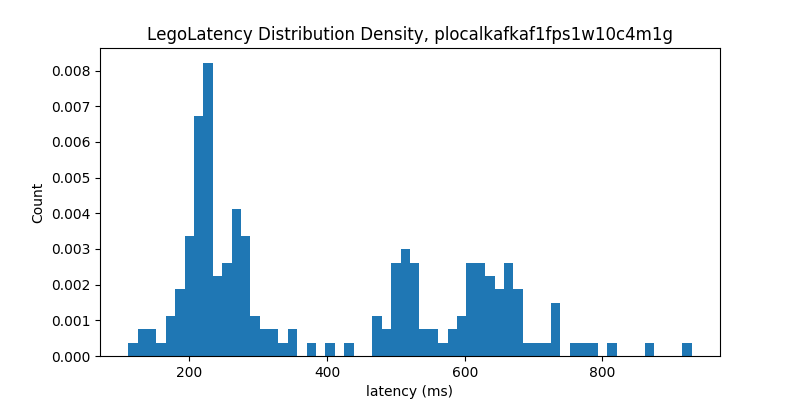

<IPython.core.display.Javascript object>


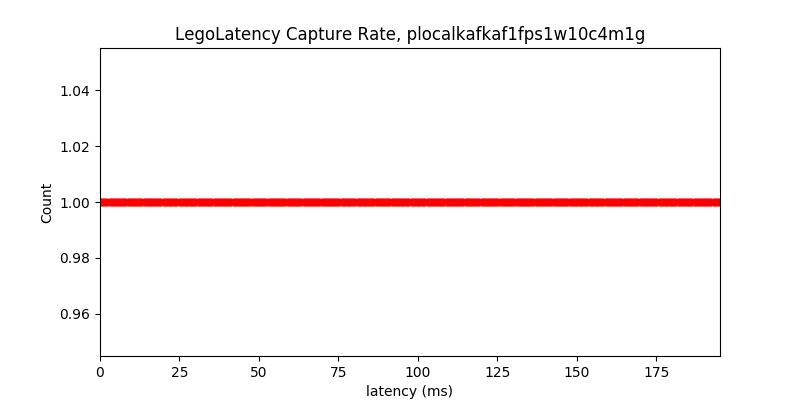

<IPython.core.display.Javascript object>


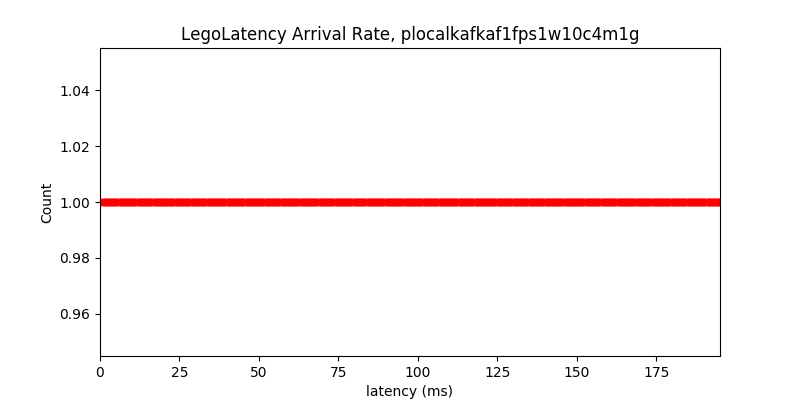

In [10]:
%matplotlib notebook

prefix = ['plocalkafka'] #, 'pwifi', 'ppoorwifi']
feeds = [1]
fpss = [1]
workers = [10]
cores = [4]
memorys = ["1g"]

choices = [prefix, feeds, fpss, workers, cores, memorys]
for combo in itertools.product(*choices):
    exp_name = '{}f{}fps{}w{}c{}m{}'.format(*combo)
    print("Experiment ({})".format(exp_name))
    tss = np.array([(item.capture, item.arrival, item.finished, item.val) for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name==exp_name).all()])
    if tss.shape[0] == 0:
        continue
    plt.figure(figsize=(8, 4))
    plt.hist(tss[:,3], density=True, bins=60);
    plt.ylabel('Count');
    plt.xlabel('latency (ms)');
    plt.title('LegoLatency Distribution Density, {}'.format(exp_name))
    
    st = min(tss[:, 0])
    plt.figure(figsize=(8, 4))
    plt.plot(tss[:, 0] - min(tss[:, 0]), [1]*len(tss[:,0]), 'ro', markersize=5);
    plt.xlim(0, max(tss[:, 0]) - min(tss[:, 0]))
    plt.ylabel('Count');
    plt.xlabel('latency (ms)');
    plt.title('LegoLatency Capture Rate, {}'.format(exp_name))

    plt.figure(figsize=(8, 4))
    plt.plot(tss[:, 1] - st, [1]*len(tss[:,1]), 'ro', markersize=5);
    plt.xlim(0, max(tss[:, 0]) - min(tss[:, 0]))
    plt.ylabel('Count');
    plt.xlabel('latency (ms)');
    plt.title('LegoLatency Arrival Rate, {}'.format(exp_name))

In [ ]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

sess = dbutils.get_session()

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="host").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability');
plt.xlabel('latency (ms)');
plt.title('LegoLatency 1 video streams at 10 FPS, 8 worker, host')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="host2separatesession").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability');
plt.xlabel('latency (ms)');
plt.title('LegoLatency 1 video streams at 10 FPS, 8 worker, host')

In [ ]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

sess = dbutils.get_session()
print('cpu vs cpu-set')
plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="batchc4m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency process from file directly, 4 core (specified by cpu), 1G memory')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="batchcpusetc4m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency process from file directly, 4 core (specified by cpuset), 1G memory')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="test").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency process test exp')

<IPython.core.display.Javascript object>


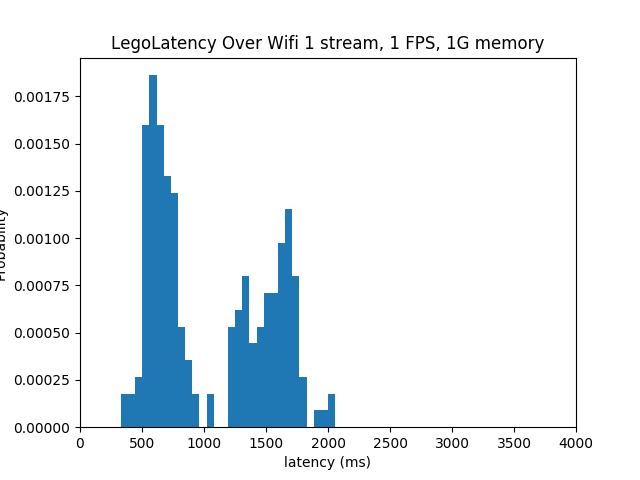

<IPython.core.display.Javascript object>


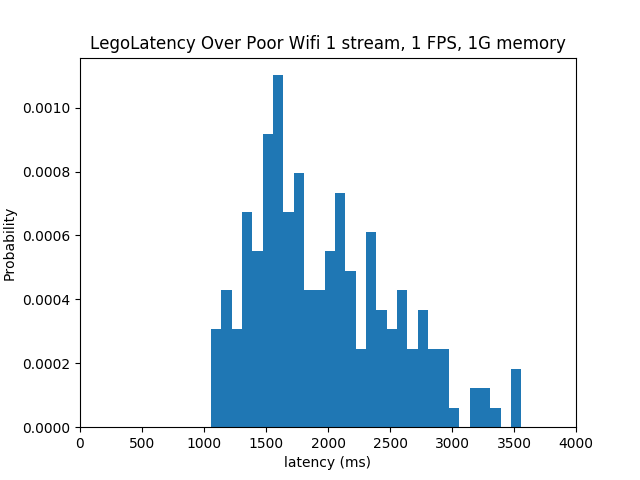

Text(0.5,1,'LegoLatency Over Poor Wifi 1 stream, 1 FPS, 1G memory')

In [6]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

sess = dbutils.get_session()
plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="pwifif1fps1w8c64m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.xlim([0, 4000])
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency Over Wifi 1 stream, 1 FPS, 1G memory')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="ppoorwifif1fps1w8c64m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.xlim([0, 4000])
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency Over Poor Wifi 1 stream, 1 FPS, 1G memory')


In [ ]:
dbutils.session.rollback()